# **Plant Disease Dectction Model**

## **Importing Libraries**

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.0 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit

print("TensorFlow:", tf.__version__)
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Scikit-learn:", sklearn.__version__)
print("Seaborn:", sns.__version__)
print("Streamlit:", streamlit.__version__)

TensorFlow: 2.18.0
NumPy: 2.0.2
Pandas: 2.2.2
Scikit-learn: 1.6.1
Seaborn: 0.13.2
Streamlit: 1.46.0


In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saadiahmed22
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


100%|██████████| 2.70G/2.70G [00:23<00:00, 123MB/s]


In [5]:
!ls /content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `ls /content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'


In [6]:
!ls /content/new-plant-diseases-dataset/test/test

AppleCedarRust1.JPG	PotatoEarlyBlight2.JPG	TomatoEarlyBlight6.JPG
AppleCedarRust2.JPG	PotatoEarlyBlight3.JPG	TomatoHealthy1.JPG
AppleCedarRust3.JPG	PotatoEarlyBlight4.JPG	TomatoHealthy2.JPG
AppleCedarRust4.JPG	PotatoEarlyBlight5.JPG	TomatoHealthy3.JPG
AppleScab1.JPG		PotatoHealthy1.JPG	TomatoHealthy4.JPG
AppleScab2.JPG		PotatoHealthy2.JPG	TomatoYellowCurlVirus1.JPG
AppleScab3.JPG		TomatoEarlyBlight1.JPG	TomatoYellowCurlVirus2.JPG
CornCommonRust1.JPG	TomatoEarlyBlight2.JPG	TomatoYellowCurlVirus3.JPG
CornCommonRust2.JPG	TomatoEarlyBlight3.JPG	TomatoYellowCurlVirus4.JPG
CornCommonRust3.JPG	TomatoEarlyBlight4.JPG	TomatoYellowCurlVirus5.JPG
PotatoEarlyBlight1.JPG	TomatoEarlyBlight5.JPG	TomatoYellowCurlVirus6.JPG


## **Data Preprocessing**

### **Training Image Preprocessing**

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False,
)

Found 70295 files belonging to 38 classes.


### **Validation Image Preprocessing**

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False,
)

Found 17572 files belonging to 38 classes.


## **Building Model**

In [9]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128,128,3]))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128,128,3]))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [13]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128,128,3]))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [14]:
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128,128,3]))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [15]:
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128,128,3]))
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units = 1500, activation  = 'relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
#Output layer :)
model.add(Dense(units = 38, activation = 'softmax'))

### **Compling Model**

In [21]:
model.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## **Model Training**

In [23]:
training_history = model.fit(x = training_set, validation_data = validation_set, epochs = 10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 161s 67ms/step - accuracy: 0.3776 - loss: 2.2200 - val_accuracy: 0.8542 - val_loss: 0.4822
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.8300 - loss: 0.5395 - val_accuracy: 0.9189 - val_loss: 0.2491
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 65ms/step - accuracy: 0.9079 - loss: 0.2857 - val_accuracy: 0.9354 - val_loss: 0.1955
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy: 0.9368 - loss: 0.1922 - val_accuracy: 0.9528 - val_loss: 0.1445
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy: 0.9540 - loss: 0.1410 - val_accuracy: 0.9452 - val_loss: 0.1747
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 192s 61ms/step - accuracy: 0.9650 - loss: 0.1063 - val_accuracy: 0.9477 - val_loss: 0.1615
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 60ms/step - accuracy: 0.9719 - loss: 0.0879 - val_accuracy: 0.9444 - val_loss: 0.1781
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 60ms/step - accuracy: 

## **Model Evaluation**

In [24]:
# on training data
train_loss, train_acc = model.evaluate(training_set)
print(train_loss, train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.9920 - loss: 0.0242
0.02208736725151539 0.9929440021514893


In [25]:
# on validation data
val_loss, val_acc = model.evaluate(validation_set)
print(val_loss, val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9683 - loss: 0.1027
0.10460669547319412 0.9678465723991394


## **Saving Model**

In [26]:
model.save("trained_model.keras")

In [27]:
import json
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

In [28]:
training_history.history

{'accuracy': [0.5799274444580078,
  0.8553382158279419,
  0.918002724647522,
  0.9420584440231323,
  0.956682562828064,
  0.9671669602394104,
  0.9719894528388977,
  0.9762998819351196,
  0.9808663725852966,
  0.9819190502166748],
 'loss': [1.4310444593429565,
  0.45527711510658264,
  0.255576491355896,
  0.17980597913265228,
  0.1329343020915985,
  0.09995920956134796,
  0.08719869703054428,
  0.07286468893289566,
  0.05918138101696968,
  0.05727231875061989],
 'val_accuracy': [0.8541998863220215,
  0.9189050793647766,
  0.9353516697883606,
  0.9528226852416992,
  0.9451969265937805,
  0.9477008581161499,
  0.9444001913070679,
  0.9655702114105225,
  0.9556680917739868,
  0.9678465723991394],
 'val_loss': [0.4821943938732147,
  0.24907970428466797,
  0.19553007185459137,
  0.144476518034935,
  0.17467905580997467,
  0.16148903965950012,
  0.17809119820594788,
  0.11657427251338959,
  0.15610811114311218,
  0.10460676997900009]}

In [29]:
from google.colab import files
files.download("trained_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
from google.colab import files
files.download("training_history.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Model Accuracy Visualization**

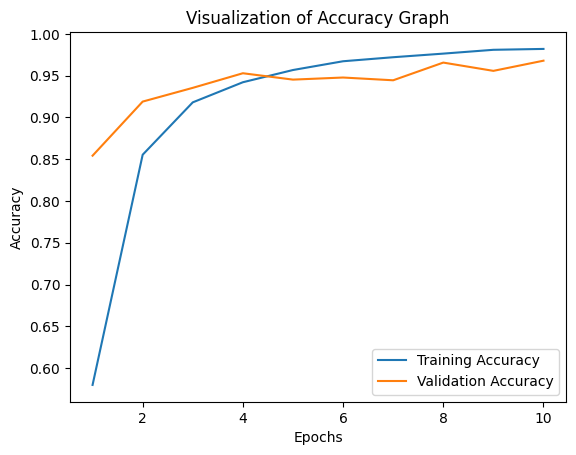

In [31]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Graph')
plt.legend()
plt.show()

## **Metrics for Model Visualization**

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
#using validation set as test_set due to test data not being accurately correct
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (128, 128),
    shuffle = False,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False,
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step


array([[9.9999917e-01, 1.0233242e-09, 2.5991195e-11, ..., 4.0074406e-14,
        4.0363451e-14, 1.2196573e-14],
       [1.0000000e+00, 1.1450390e-08, 5.6239015e-12, ..., 1.5201062e-17,
        4.1445507e-16, 1.3683031e-16],
       [1.0000000e+00, 8.2041025e-13, 2.4316949e-14, ..., 1.6704131e-19,
        3.2997389e-16, 2.7783816e-17],
       ...,
       [5.3548245e-08, 3.1736966e-10, 6.9792009e-08, ..., 3.7862531e-09,
        4.7250122e-08, 9.9997008e-01],
       [2.1641897e-09, 1.9377677e-12, 3.0418945e-10, ..., 2.7418699e-11,
        3.8307985e-10, 9.9999976e-01],
       [3.7549277e-18, 4.3960171e-20, 6.0762744e-19, ..., 1.7759346e-20,
        3.5092554e-18, 1.0000000e+00]], dtype=float32)

In [35]:
y_pred.shape

(17572, 38)

In [36]:
predicted_categories = tf.argmax(y_pred, axis = 1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [37]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)

In [38]:
Y_true = tf.argmax(true_categories, axis = 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(Y_true, predicted_categories, target_names = class_name)
print(report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       504
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.92      0.96       440
                                   Apple___healthy       0.95      0.98      0.97       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.95      0.98       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

In [41]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[489,   4,   0, ...,   0,   0,   0],
       [  0, 489,   0, ...,   0,   0,   0],
       [  3,   0, 406, ...,   1,   0,   1],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   0, ...,   0, 442,   1],
       [  0,   0,   1, ...,   0,   0, 479]])

## **Confusion Matrix Visualization**

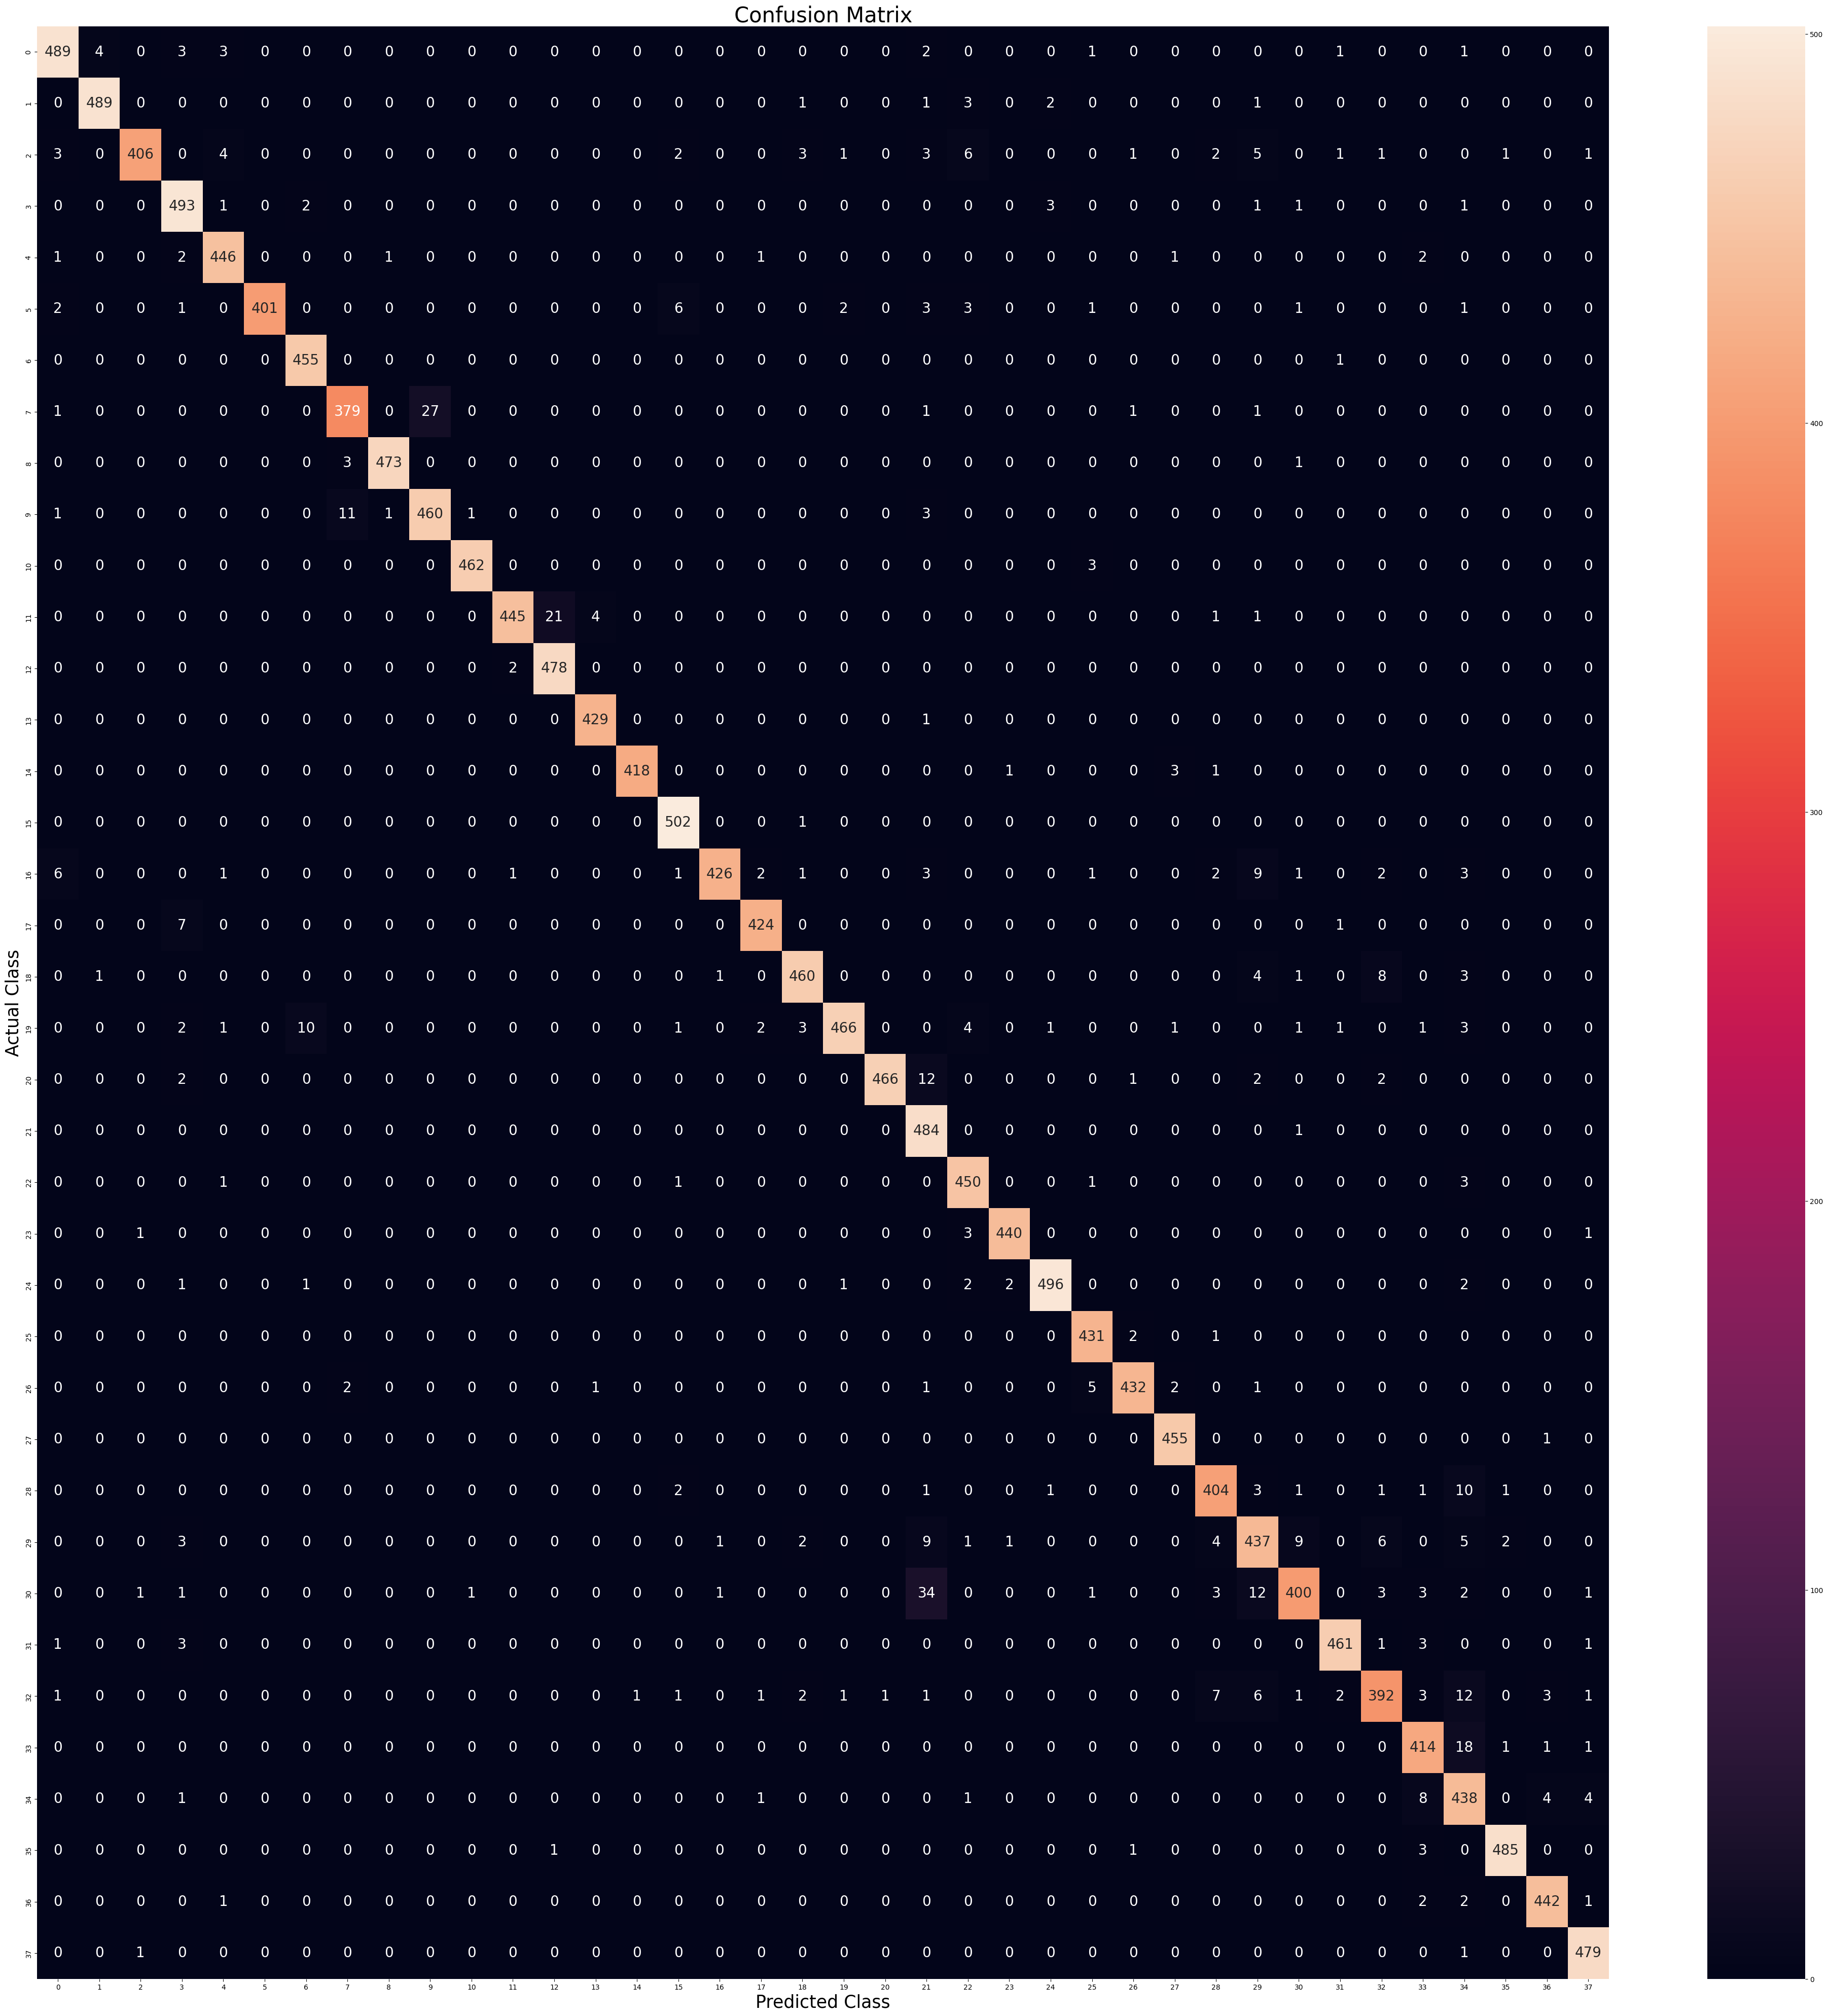

In [46]:
plt.figure(figsize=(50,50))
sns.heatmap(cm, annot = True, fmt = 'd', annot_kws = {'size': 20})
plt.ylabel('Actual Class', fontsize = 25)
plt.xlabel('Predicted Class', fontsize = 25)
plt.title('Confusion Matrix', fontsize = 30)
plt.show()

## **Testing the Model**

In [47]:
!pip install opencv-python

Visualization of Single Image

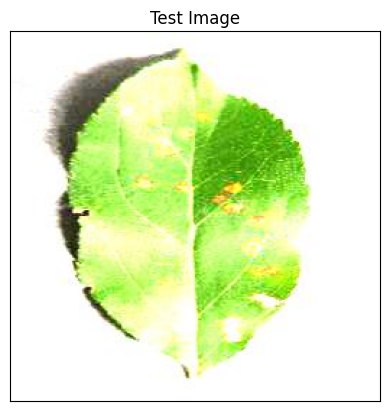

In [48]:
import cv2
image_path = "/content/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convert to RGB color

plt.imshow(img)
plt.title("Test Image")
plt.xticks([]) #removes x axis
plt.yticks([]) #removes y axis
plt.show()

In [49]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size = (128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #convert Single Image to a Batch
print(input_arr.shape, input_arr)

(1, 128, 128, 3) [[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]]


In [50]:
predictions = model.predict(input_arr)
predictions.shape, predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


((1, 38),
 array([[6.6222265e-07, 1.4157873e-04, 9.5631754e-01, 5.0734122e-10,
         8.1089420e-05, 6.9714467e-08, 2.3754942e-10, 1.9499982e-08,
         1.3854867e-10, 1.5363849e-09, 4.4701066e-12, 1.2942725e-04,
         3.5776330e-07, 4.1828299e-10, 7.6995130e-09, 2.0086701e-07,
         1.9642778e-03, 2.4137730e-06, 3.8816832e-02, 2.1147619e-06,
         1.2361511e-08, 2.2108514e-08, 5.7876292e-08, 9.1924299e-09,
         7.1282330e-10, 1.5886116e-09, 9.6693987e-07, 8.0610825e-09,
         4.4631174e-06, 2.4190855e-03, 6.6406405e-06, 3.7710709e-08,
         1.9314855e-05, 7.0604314e-09, 8.3543164e-05, 5.7563916e-06,
         3.3352630e-06, 1.8602975e-07]], dtype=float32))

In [51]:
result_index = np.argmax(predictions)
result_index

np.int64(2)

## **Displaying Result**

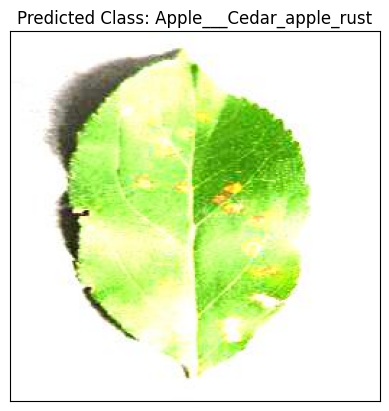

In [52]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title("Predicted Class: " + model_prediction)
plt.xticks([])
plt.yticks([])
plt.show()